# Python Workshop for cand.merc*

Introduktion til brug af notebooks og python. Pandas dokumentationen kan findes her: https://pandas.pydata.org/pandas-docs/stable/reference/
Liste over regneoperatorer i python kan ses [her](https://www.w3schools.com/python/python_operators.asp)


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Del 1

## Filnavne for datasættene

In [3]:
data1 = 'fake_da_regnskab.csv'
data2 = 'fake_us_da_regnskab.csv' 
data3 = 'fake_us_regnskab.csv'

### Indlæs i pandas


In [4]:
df1 = pd.read_csv(data1, index_col='id')
df1.head()

,dato,beskrivelse,omkostning (kr),medarbejder
id,,,,
100,2023-03-29,Reagere vend godt tilbage.,25055.65,Bo Laursen
101,2023-07-18,Vagt transportør voldsom.,80706.36,Univ.Prof. Hjalte Kristensen
102,2022-10-25,Konto konstant aldrig.,60634.79,Hr Bjarne Thomsen
103,2022-12-24,Brev trykke synes svare.,30714.93,Winnie Jepsen
104,2023-04-11,Barn stil glemme tegne.,24081.46,Winnie Jepsen


Optælling af rækker:

In [5]:
df1.count()

dato               20
beskrivelse        20
omkostning (kr)    20
medarbejder        20
dtype: int64

#### Hvordan er datatyperne?

In [6]:
df1.dtypes

dato                object
beskrivelse         object
omkostning (kr)    float64
medarbejder         object
dtype: object

Objects er "alt", så kan udmiddelbart fint holde text, men problematisk for tid. Derfor konverteres de:

In [7]:
df1['dato'] = pd.to_datetime(df1['dato'])

In [8]:
df1.dtypes

dato               datetime64[ns]
beskrivelse                object
omkostning (kr)           float64
medarbejder                object
dtype: object

### Indlæs data2

In [9]:
df2 = pd.read_csv(data2, index_col='id')
df2['dato'] = pd.to_datetime(df2['dato'])

In [10]:
df2.head()

,dato,beskrivelse,medarbejder,omkostning ($)
id,,,,
200,2022-11-24,Print frugt radio.,Univ.Prof. Hjalte Kristensen,14331.22
201,2022-11-12,Fejre kok hotel levested.,Winnie Jepsen,9066.00
202,2023-04-12,Kage hvornår gammel prøve.,Winnie Jepsen,1379.11
203,2022-10-11,Rød husstand ofte.,Bo Laursen,13545.35
204,2023-07-30,Hit industri direkte beløb.,Winnie Jepsen,8585.69


In [11]:
df2.dtypes

dato              datetime64[ns]
beskrivelse               object
medarbejder               object
omkostning ($)           float64
dtype: object

## To datasæt skal smeltes sammen til eet.

df1 og df2 skal ensrettes, men hvordan?

### Samling af 2 dataframes

Dagens valutakurs:

In [12]:
dagens_kurs_dk_us = 6.5

In [13]:
df2['omkostning ($)'] * dagens_kurs_dk_us

id
200    93152.930
201    58929.000
202     8964.215
203    88044.775
204    55806.985
205    80383.030
206    88714.730
207     3911.830
208    13026.325
209    86816.925
210    46988.890
211    33209.540
212     2987.660
213    72374.445
214    87210.890
215    91100.490
216    79725.945
217    82601.155
218     3875.820
219    32590.025
Name: omkostning ($), dtype: float64

**Huske at gemme beregningen i Dataframen:**

In [14]:
df2.head()

,dato,beskrivelse,medarbejder,omkostning ($)
id,,,,
200,2022-11-24,Print frugt radio.,Univ.Prof. Hjalte Kristensen,14331.22
201,2022-11-12,Fejre kok hotel levested.,Winnie Jepsen,9066.00
202,2023-04-12,Kage hvornår gammel prøve.,Winnie Jepsen,1379.11
203,2022-10-11,Rød husstand ofte.,Bo Laursen,13545.35
204,2023-07-30,Hit industri direkte beløb.,Winnie Jepsen,8585.69


In [15]:
df2['omkostning (kr)'] = df2['omkostning ($)'] * dagens_kurs_dk_us

In [16]:
df2.head()

,dato,beskrivelse,medarbejder,omkostning ($),omkostning (kr)
id,,,,,
200,2022-11-24,Print frugt radio.,Univ.Prof. Hjalte Kristensen,14331.22,93152.930
201,2022-11-12,Fejre kok hotel levested.,Winnie Jepsen,9066.00,58929.000
202,2023-04-12,Kage hvornår gammel prøve.,Winnie Jepsen,1379.11,8964.215
203,2022-10-11,Rød husstand ofte.,Bo Laursen,13545.35,88044.775
204,2023-07-30,Hit industri direkte beløb.,Winnie Jepsen,8585.69,55806.985


In [17]:
df2 = df2.drop('omkostning ($)', axis=1)

In [18]:
df2.head()

,dato,beskrivelse,medarbejder,omkostning (kr)
id,,,,
200,2022-11-24,Print frugt radio.,Univ.Prof. Hjalte Kristensen,93152.930
201,2022-11-12,Fejre kok hotel levested.,Winnie Jepsen,58929.000
202,2023-04-12,Kage hvornår gammel prøve.,Winnie Jepsen,8964.215
203,2022-10-11,Rød husstand ofte.,Bo Laursen,88044.775
204,2023-07-30,Hit industri direkte beløb.,Winnie Jepsen,55806.985


### Samling af dataframes

Merging (Samling) af dataframes, sker ved at oprette en ny ved hjælp af metoden pd.concat()

In [19]:
df = pd.concat([df1,df2])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 100 to 219
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   dato             40 non-null     datetime64[ns]
 1   beskrivelse      40 non-null     object        
 2   omkostning (kr)  40 non-null     float64       
 3   medarbejder      40 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.6+ KB


### Udvælge enkelte kolloner

Hvordan kan jeg nøjes med at få enkelte kolloner ud, f.eks. kun Navn og Omkostning (kr)

In [21]:
df[['medarbejder', 'omkostning (kr)']].head()

,medarbejder,omkostning (kr)
id,,
100,Bo Laursen,25055.65
101,Univ.Prof. Hjalte Kristensen,80706.36
102,Hr Bjarne Thomsen,60634.79
103,Winnie Jepsen,30714.93
104,Winnie Jepsen,24081.46


### Hvem har solgt for mest?

In [22]:
df[['medarbejder', 'omkostning (kr)']].max()

medarbejder        Winnie Jepsen
omkostning (kr)         93152.93
dtype: object

In [23]:
df.loc[df['omkostning (kr)'] == 93152.93]

,dato,beskrivelse,omkostning (kr),medarbejder
id,,,,
200,2022-11-24,Print frugt radio.,93152.93,Univ.Prof. Hjalte Kristensen


Det var jo ikke den korrekte medarbejder!

In [24]:
df = df.sort_values(by='omkostning (kr)', ascending=True)

In [25]:
df.head()

,dato,beskrivelse,omkostning (kr),medarbejder
id,,,,
212,2023-04-20,Kant konflikt tag næste.,2987.660,Prof. Ivan Jakobsen
218,2023-06-16,Til syg lille glemme kaffe.,3875.820,Bo Laursen
207,2022-11-27,Pund håndværk ly ny urban.,3911.830,Winnie Jepsen
202,2023-04-12,Kage hvornår gammel prøve.,8964.215,Winnie Jepsen
208,2023-03-22,Fugl hård fru.,13026.325,Bo Laursen


In [26]:
df.tail()

,dato,beskrivelse,omkostning (kr),medarbejder
id,,,,
203,2022-10-11,Rød husstand ofte.,88044.775,Bo Laursen
206,2022-11-20,Olie flyselskab fænomen.,88714.730,Bo Laursen
215,2023-03-28,Underskud dybt person de.,91100.490,Hr Bjarne Thomsen
114,2022-12-06,Matematik krænkelse store.,91758.490,Hr Bjarne Thomsen
200,2022-11-24,Print frugt radio.,93152.930,Univ.Prof. Hjalte Kristensen


Men vi kan også få resultatet direkte ved at spørge på den enkelte række og i python tæller vi fra 0 til -1 :-)

In [27]:
df.iloc[-1]

dato                        2022-11-24 00:00:00
beskrivelse                  Print frugt radio.
omkostning (kr)                        93152.93
medarbejder        Univ.Prof. Hjalte Kristensen
Name: 200, dtype: object

# Del 2

Der er nu kommet endnu et datasæt. Nu skal der konverteres til $ i stedet for kr. og der skal findes medarbejderen med mindste salg.

In [28]:
df3 = pd.read_csv(data3, index_col='id')
df3['dato'] = pd.to_datetime(df3['dato'])

In [29]:
df3.head()

,dato,beskrivelse,medarbejder,omkostning ($)
id,,,,
300,2022-12-24,Foreslå fase telefon ja.,Hr David Jensen,7698.44
301,2023-04-19,Sædvanlig hun hals nat.,Karlo Kristiansen,7094.34


Opgave: Samle df3 med df1 og df2, hvor der arbejdes i USD istedet for kr.

# Del 3


## Visualisering af vores datasæt df

[DOCUMENTATION](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) her et eksempel på et scatterplot på dato og omkostningen i (kr)

In [30]:
import matplotlib.pyplot as plt

<Axes: xlabel='dato', ylabel='omkostning (kr)'>

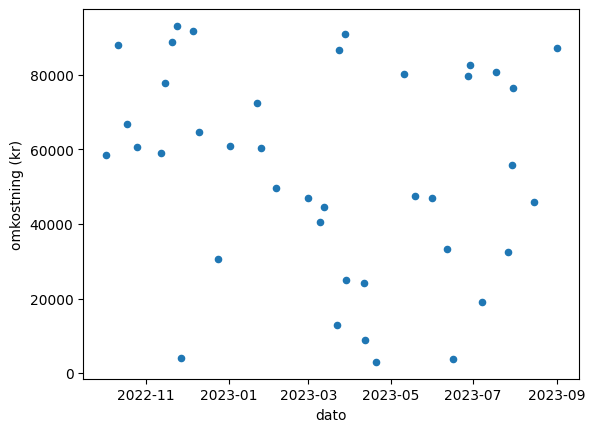

In [31]:
df.plot(x='dato', y='omkostning (kr)', kind='scatter')

## Virksomheden er opkøbt, vi skal have lavet en sundhedsprofil

Indlæs datasæt4

In [32]:
data4 = 'fake_people.csv'

In [33]:
df4 = pd.read_csv(data4, index_col='id')

<Axes: xlabel='medarbejder'>

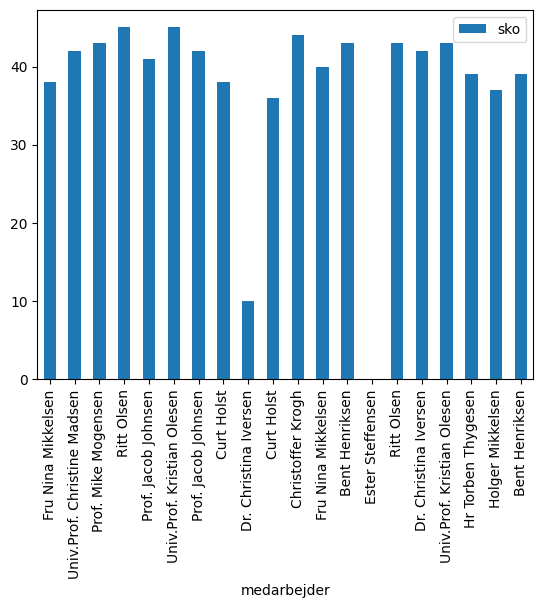

In [34]:
df4.plot(x='medarbejder', y='sko',  kind='bar')

**Bedre metode:** Find hvem og hvilken værdi der er forkert

In [35]:
df4.describe()

,hoejde,vaegt,sko
count,20.000000,19.000000,19.000000
mean,10.257000,86.842105,39.473684
std,37.835194,19.723824,7.618460
min,1.600000,50.000000,10.000000
25%,1.710000,73.500000,38.500000
50%,1.780000,84.000000,42.000000
75%,1.950000,100.500000,43.000000
max,171.000000,118.000000,45.000000


In [36]:
df4[df4['sko'] < 30 ]

,medarbejder,hoejde,vaegt,sko
id,,,,
9,Dr. Christina Iversen,1.88,116.0,10.0


In [37]:
df4.loc[9, 'sko'] = 41.5

<Axes: xlabel='medarbejder'>

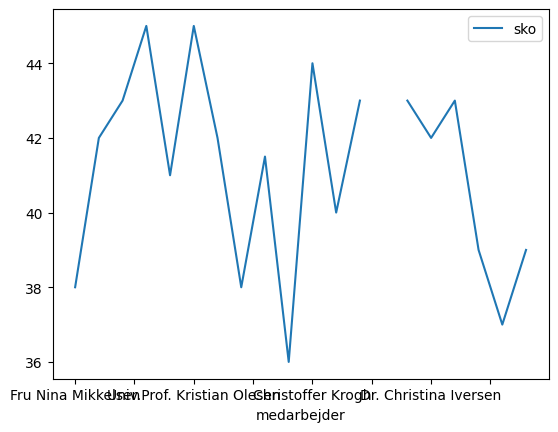

In [38]:
df4.plot(x='medarbejder', y='sko')

In [39]:
df4 = df4.dropna()

<Axes: xlabel='medarbejder'>

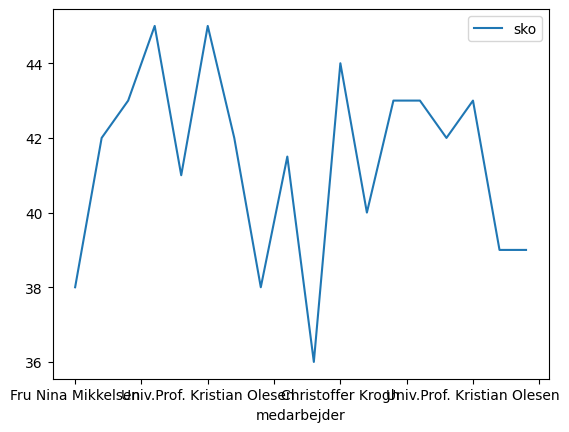

In [40]:
df4.plot(x='medarbejder', y='sko')

In [41]:
df4 = df4.dropna(subset=['sko'])

<Axes: xlabel='medarbejder'>

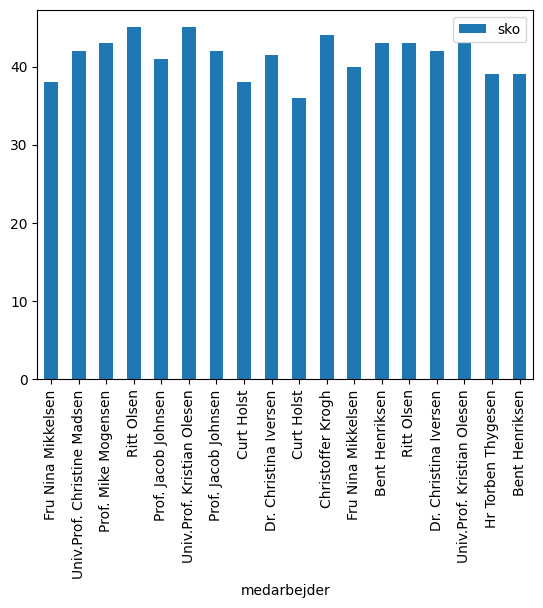

In [42]:
df4.plot(x='medarbejder', y='sko', kind='bar')

In [43]:
# DER SKAL SLETTES HERUNDER; DETTE ER MIN EGEN LØSNING!

### Undersøg datasættet, hvilke variable er der.

In [44]:
df4.head()

,medarbejder,hoejde,vaegt,sko
id,,,,
1,Fru Nina Mikkelsen,1.98,99.0,38.0
2,Univ.Prof. Christine Madsen,1.72,100.0,42.0
3,Prof. Mike Mogensen,1.70,69.0,43.0
4,Ritt Olsen,1.83,59.0,45.0
5,Prof. Jacob Johnsen,1.62,84.0,41.0


Udregn bmi = vægt / højde^2, hvordan ser det ud?

# Xtra

Datatyper kan betyde meget, fx. når vi ønsker at bruge datoerne, som angivelse af tid og ikke bare en repræsentation.

In [45]:
df.dtypes

dato               datetime64[ns]
beskrivelse                object
omkostning (kr)           float64
medarbejder                object
dtype: object

Datatyperne er ikke i overensstemmelse med hvad vi kan se. "Object" er en type, der kan holde nærmest alt. 
Så vi ændrer dem til mere korrekte. Dette gør vi i en dictionary, som kaldes et key:value store. 
For at pandas kan finde ud af konvertere dato kollonen til et datoformat, skal den først laves til en string

In [47]:
korrekte_data_typer = {'id': int, 'dato': pd.StringDtype(), 'beskrivelse': pd.StringDtype(), 'omkostning (kr)': float, 'medarbejder':
                       pd.StringDtype(), 'hoejde': int}
dato_felter = ['dato']

In [48]:
df1 = pd.read_csv(data1, dtype=korrekte_data_typer, parse_dates=dato_felter)
df1.dtypes

id                          int64
dato               datetime64[ns]
beskrivelse        string[python]
omkostning (kr)           float64
medarbejder        string[python]
dtype: object